[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/QuCAI-Lab/qhack2022-hackeinberg-project/blob/dev/presentation.ipynb)
[![License](https://img.shields.io/github/license/QuCAI-Lab/QHack2022.svg?logo=CreativeCommons&style=flat-square)](https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project/blob/dev/LICENSE.md)
![Contributions](https://img.shields.io/badge/contributions-welcome-orange?style=flat-square)
[![Maintenance](https://img.shields.io/badge/Maintained%3F-yes-green.svg)](https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project/graphs/commit-activity)
[![Build Status](https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project/actions/workflows/tests.yml/badge.svg?branch=dev)](https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project/actions/workflows/tests.yml)
[![Release](https://img.shields.io/github/release/QuCAI-Lab/qhack2022-hackeinberg-project.svg)](https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project/releases)
[![commit](https://img.shields.io/github/last-commit/QuCAI-Lab/qhack2022-hackeinberg-project)](https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project/commits)
[![Forks](https://img.shields.io/github/forks/QuCAI-Lab/qhack2022-hackeinberg-project)](https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project/fork)

<div align="center">
  <h1> <a href="https://qhack.ai/events#hackathon-challenges"> QHack2022 Open Hackaton </a> - Hackeinberg Team Project </h1>
  <h2> Extending Adaptive Methods for Finding an Optimal Circuit Ansatze in VQE Optimization</h2>
</div>
<br>

<center> <b>Authors: ¹Lucas Camponogara Viera, ²José Paulo Marchezi</b></center>
<center>
<b><a target="_blank" href="https://en.ntnu.edu.tw/">¹National Taiwan Normal University - NTNU, Taipei, Taiwan</a></b>.
<br>
<b><a target="_blank" href="https://www.gov.br/inpe/pt-br">²National Institute for Space Research - INPE, São José dos Campos, SP, Brazil</a></b>.
<br>
<b><a target="_blank" href="http://english.nssc.cas.cn/">²State  Key  Laboratory  of  Space  Weather,  National  Space  Science  Center, Chinese  Academy  of  Sciences, China</a></b>.
</center>

<br>

[comment]: <> ()
<table class="tfo-notebook-buttons" align="head">
  <td>
    <a target="_blank" href="https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table>

<center><a href="https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project"><b>View source on GitHub.</b></a></center>

    


In [ ]:
%autosave 30

Autosaving every 30 seconds


---

In this jupyter notebook, the authors describe a step-by-step implementation of a hybrid quantum-classical optimization approach to find the optimal gate arrangement of a problem-specific ansatze (quantum circuit). We demonstrate the variational circuit approach to find the ground state of the LiH molecule considering only single and double excitations.

---

# **Project Description**


## Background and Motivation

Most widely considered hardware-efficient and Chemistry-inspired ansatze, although generic, suffer from either barren plateaus [[1](https://www.nature.com/articles/s41467-018-07090-4)] or inconsistency under low-order trotterization steps [[2](https://pubs.acs.org/doi/abs/10.1021/acs.jctc.9b01083)], respectively. To circumvent this drawback, different algorithms for optimization of variational quantum circuits (VQA), the so-called adaptive circuits, have already been proposed in the literature [[4](https://pennylane.ai/qml/demos/tutorial_adaptive_circuits.html)]. One example is the Adaptive Derivative-Assembled Pseudo-Trotter ansatz Variational Quantum Eigensolver (ADAPT-VQE) [[3](https://www.nature.com/articles/s41467-019-10988-2)]. In a nutshell, the ADAPT-VQE approach is to grow the ansatz by adding fermionic operators one-at-a-time so to preserve the amount of correlation energy. This approach can also be regarded as a particular optimization procedure for Full Configuration Interaction (FCI) VQE.

In this work, we combine some of the existing methods applied to the hybrid quantum-classical VQE [[5](https://doi.org/10.1038/ncomms5213)] algorithm for the particular case of the ground state of the LiH molecule. We prioritize the minimization of the circuit depth (the longest sequence of gates acting on a qubit register) at the cost of increasing parameter count (the number of parameters to be optimized) given the tradeoff between difficulty in implementation on NISQ devices vs difficulty in optimization on classical computers, respectively. The baseline approach took into consideration the following features for a good ansatz:

1. Coherence friendly: the circuit must be shallow, i.e, have a small number of layers in order to be computed during a time window smaller than the decoherence time.
2. Hardware friendly (qubit routing): gate coupling allowed only between nearest-neighbor qubits to avoid SWAP gates during qubit routing (mapping from the circuit diagram to a hardware topology).
3. Small number of hyperparameters: we seek the minimum amount of angles to be optimized in order to avoid classical optimization overhead (when classical computation becomes too expensive).

In its early stages, the goal is to find a quasi-optimal ansatz by restricting the VQE simulation to single and double order excitations only. For the future, we plan to use a deep reinforcement learning approach to learn an exact circuit ansatz considering higher excitation orders and the [Qamuy SDK](https://qamuy.qunasys.com/docs/en/).




## Algorithm outline

1. With the spin orbitals of the molecule of interest, compute its second-quantized electronic Hamiltonian in the STO-3G basis.

2. Map the fermionic Hamiltonian given in terms of its fermionic operators into a spin qubit-equivalent Hamiltonian using either Bravyi-Kitaev or the inverted Jordan–Wigner transformation. This is required to perform gate-based quantum computation. The Hamiltonian will be used to compute the cost function that evaluates the expectation value of the Hamiltonian, while the number of qubits is required to obtain the electronic excitations and to set up the quantum circuit.

3. Obtain the single and double electronic excitations by acting with the electron annihilation and creation operators on the Hartree-Fock reference state.

4. Define a set with all unique single and double excitations to create the correspondent SO(2) unitary qubit gates (the particular Givens rotations) to each electronic excitation operator in order to build a quantum circuit ansatz of particle-conserving unitary qubit gates.

5. Initialize the qubit state to a reference Hartree-Fock state.

6. Initialize the parameter values of each gate in the ansatz to zero, i.e, initialize the ansatz to the identity matrix in order to compute the gradients with respect to the Hartree-Fock state.

7. Prepare the trial estate with the current ansatz.

8. Define the cost function as the expectation value of the qubit Hamiltonian. Define an optimizer (e.g. SGD).

9. Use the parameter shift rule to compute the gradient of the cost function with respect to its tunable parameters.

10. Identify the operators (gates) with the maximum and minimum gradient in magnitude. Add to the ansatz the gate whose gradient is at maximum magnitude. Remove from the set the gate with the gradient at minimum magnitude if it is smaller than a predefined threshold. Here, we add one gate per iteration while deleting a single gate if it satisfies the above condition.

11.  Use the optimizer to update the circuit parameters according to a VQE experiment.

12. Define convergence as the difference between the ground truth and the expected value for the current optimization step. If the convergence tolerance is less than or equal to a pre-defined threshold $\epsilon$, exit the optimization loop and evaluate the cost metric of the final optimized circuit by measuring its circuit depth.

13. Repeat step 9.

## Outlook

For the future, if possible, we plan to frame the variational quantum algorithm (VQA) as a deep reinforcement learning paradigm to learn an exact circuit ansatz considering higher excitation orders.

# &nbsp; <a href="https://creativecommons.org/licenses/by/4.0/"><img valign="middle" src="https://img.icons8.com/copyright" width="50"></a> License

In [ ]:
#@title Copyright 2022.
# This code is part of qhack2022-hackeinberg-project.
#
# (C) Copyright NTNU QuCAI-Lab, 2022.
#
# This code is licensed under the Creative Commons Zero v1.0 Universal License. 
# You may obtain a copy of the License at https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project/blob/dev/LICENSE.md.

# &nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a> Colab's memory card 

"Executing a code cell within a GPU or TPU runtime does not mean that GPU or TPU is being used." 

[For more information about GPU usage on Colab](https://research.google.com/colaboratory/faq.html#gpu-availability).

## CPU

1. Click on the tab `Runtime -> Change runtime type`.
1. Click on `Hardware accelerator`.
1. Select `None` from the drop-down menu and click `Save`.
1. Click `Connect` in the upper right corner and select `Connect to hosted runtime` (if not automatically).

In [ ]:
!free -h    # Show CPU Memory.
              # 'free' = wasted memory (not being used).
              # 'available' = memory for allocation.
              # 'buff/cache' used memory for cache (Data has been read) and buffer (data is being written).
              # 'free' + 'buff/cache' = 'available'.

print('')
!lscpu      # Show CPU Architecture.

              total        used        free      shared  buff/cache   available
Mem:            12G        1.3G        8.9G        1.2M        2.5G         11G
Swap:            0B          0B          0B

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2200.140
BogoMIPS:            4400.28
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constan

## GPU

1. Click on the tab `Runtime -> Change runtime type`.
1. Click on `Hardware accelerator`.
1. Select `GPU` from the drop-down menu and click `Save`.
1. Click `Connect` in the upper right corner and select `Connect to hosted runtime` (if not automatically).

In [ ]:
!nvidia-smi #Show GPU Card

# &nbsp; <a href="https://colab.research.google.com/"><img valign="middle" src="https://www.tensorflow.org/images/colab_logo_32px.png" width="50"></a> Pip Install

**Run this cell only if you are running this jupyter notebook on google colab.**

**Installing `Qamuy`, `PennyLane`, `pennylane-qchem`, `pyscf`, `openfermionpyscf`, and `pylatexenc`.**


In [ ]:
'''
# Installing a non-default library

!python3 -m pip install <library_name>

# Alternative 

!apt-get -qq install -y <library_name> && python3 -m pip install -U <library_name> 

# Upgrading an installed library

!python3 -m pip install -U --upgrade <library_name> 
'''

'\n# Installing a non-default library\n\n!python3 -m pip install <library_name>\n\n# Alternative \n\n!apt-get -qq install -y <library_name> && python3 -m pip install -U <library_name> \n\n# Upgrading an installed library\n\n!python3 -m pip install -U --upgrade <library_name> \n'

In [ ]:
!pip --version

pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


**Qamuy:**

In [ ]:
#!python3 -m pip install qamuy-client --extra-index-url https://download.qamuy.qunasys.com/simple/

**PennyLane:**

In [ ]:
!python3 -m pip install PennyLane==0.21.0

**pennylane-qchem:**

In [ ]:
!python3 -m pip install pennylane-qchem

**pyscf**:

In [ ]:
!python3 -m pip install pyscf --user

**Open Fermion**:

In [ ]:
!python3 -m pip install openfermionpyscf==0.5

**Native numpy:**

In [ ]:
#!python3 -m pip install numpy==1.20.3

**pylatexenc**:

In [ ]:
!python3 -m pip install pylatexenc

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/python" width="45" hspace="0px" vspace="0px"></a> Dependencies

Alternatively, you may resort to the `requirements.txt` file at the official [GitHub repo](https://github.com/QuCAI-Lab/qhack2022-hackeinberg-project/blob/dev/requirements.txt).


In [ ]:
import sys, subprocess
import IPython
import time

#import qamuy.chemistry as qy
#from qamuy.client import Client

import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np
import matplotlib

if "google.colab" in sys.modules:
  cmd = "python3 -m pip install --upgrade watermark"
  process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)   

In [ ]:
%load_ext watermark
%watermark -a 'Lucas Camponogara Viera' -gu 'camponogaraviera' -ws 'https://qucai-lab.github.io/' -w -u -d -v -m -iv -r -b

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Lucas Camponogara Viera

Github username: camponogaraviera

Website: https://qucai-lab.github.io/

Last updated: 2022-03-07

Python implementation: CPython
Python version       : 3.7.12
IPython version      : 5.5.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.144+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git repo: 

Git branch: 

pennylane      : 0.21.0
IPython        : 5.5.0
sys            : 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
matplotlib     : 3.2.2
pennylane_qchem: 0.21.0

Watermark: 2.3.0



In [ ]:
#%watermark?

In [ ]:
qml.about()

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Name: PennyLane
Version: 0.21.0
Summary: PennyLane is a Python quantum machine learning library by Xanadu Inc.
Home-page: https://github.com/XanaduAI/pennylane
Author: None
Author-email: None
License: Apache License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: cachetools, autograd, semantic-version, scipy, pennylane-lightning, networkx, appdirs, retworkx, autoray, numpy, toml
Required-by: PennyLane-Qchem, PennyLane-Lightning
Platform info:           Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic
Python version:          3.7.12
Numpy version:           1.21.5
Scipy version:           1.4.1
Installed devices:
- default.gaussian (PennyLane-0.21.0)
- default.mixed (PennyLane-0.21.0)
- default.qubit (PennyLane-0.21.0)
- default.qubit.autograd (PennyLane-0.21.0)
- default.qubit.jax (PennyLane-0.21.0)
- default.qubit.tf (PennyLane-0.21.0)
- default.qubit.torch (PennyLane-0.21.0)
- lightning.qubit (PennyLane-Lightning-0.21.0)


In [ ]:
print(IPython.sys_info())

{'commit_hash': 'b467d487e',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/usr/local/lib/python3.7/dist-packages/IPython',
 'ipython_version': '5.5.0',
 'os_name': 'posix',
 'platform': 'Linux-5.4.144+-x86_64-with-Ubuntu-18.04-bionic',
 'sys_executable': '/usr/bin/python3',
 'sys_platform': 'linux',
 'sys_version': '3.7.12 (default, Jan 15 2022, 18:48:18) \n[GCC 7.5.0]'}


# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/physics" width="45" hspace="0px" vspace="0px"></a> Implementation

**Definitions:**



- symbols: a list of strings labeling the atoms of the molecule.
- geometry: a 1D numpy tensor defining the orbital coordinates of the molecule.
- H: the molecular Hamiltonian of the system in the qubit representation.
- qubits: the number of qubits (int).
- electrons: the number of active electrons for simulation (int).
- singles: a list of 8 elements where each element is another list with 2 indices of the spin orbitals.
- doubles: a list of 16 elements where each element is another list with 4 indices of the spin orbitals.
- sets: a list containing the total spin orbital indices used to build the Givens rotations a.k.a particle-preserving operators (qubit gates).
- HF:  a numpy.ndarray of shape ((10,) representing the Hartree-Fock state vector.
- params: a numpy tensor containing the angles to be optimized.
- energy: a list containing the optimized expected values of the Hamiltonian.
- opt: the optimizer (e.g., SGD, Adam, Adagrad, etc.).
- dev: the PennyLane Python module defining the simulator type.
- cost(): a function that returns the expectation value of the Hamiltonian according to $\langle \psi_{HF}|U^{\dagger}HU|\psi_{HF}\rangle$.
- ansatz(): a function defining the quantum circuit and parametrized gates to be optimized.

- grads: a <class 'numpy.ndarray'> of shape sets.shape containing the gradient of the cost function w.r.t the angle of each gate.




## Pennylane

**Algorithm**

- Steps 1 and 2 are implemented with the qchem.molecular_hamiltonian() function that returns both the fermionic-to-qubit transformed Hamiltonian and the number of qubits.

- Step 3 is implemented using the qchem.excitations() function.

- Step 4 is implemented with the SingleExcitation() and DoubleExcitation() classes, respectively, by passing the return of the qchem.excitations() function, i.e, the lists with the indices of the spin orbitals.

- Step 5 is implemented with the qml.BasisState class provided the HF state is obtained with the function qchem.hf_state function.

- Step 6 is a simple numpy tensor.

- At step 8, the cost function can be implemented either with the built-in ExpvalCost() class or as a custom function returning the expectation value of the circuit using the expval() class. The primary optimizer of choice is SGD defined by the GradientDescentOptimizer(stepsize=float) class.

- Step 9 is implemented with the grad() class. 

- Step 11 is computed using the GradientDescentOptimizer.step() method.

### The algorithm as described in the outline

By using all gates available in the initial ansatz, we see the presence of [Barren Plateaus](https://www.tensorflow.org/quantum/tutorials/barren_plateaus) (gradients that vanish exponentially with increasing number of qubits). Barren Plateaus can appear only by adding a single layer of single-qubit rotation gates, one rotation of a single parameter (all gates with the same angle of rotation) per qubit.

In [ ]:
#! /usr/bin/python3

import pennylane as qml
from pennylane import numpy as np
from pennylane import qchem
import time
#import qamuy.chemistry as qy
#import qamuy.plot

def qunasys_qamuy():
  """Function to run simulation with Qamuy SDK."""
  print("That's all folks! To be continued...")

def penny_simulation(params, H, HF, sets, qubits, conv_tol, threshold):
  """Main function to run the optimization loop.

  Args:
      - params (tensor): the parameters to be optimized in the ansatz.
      - H: the molecular Hamiltonian of the system in the qubit representation.
      - HF (numpy.ndarray): the Hartree-Fock state vector.
      - sets (list): total spin orbital indices used to build the Givens rotations a.k.a particle-preserving operators (qubit gates).
      - qubits (int): the number of qubits used to build the circuit.
      - conv_tol (float): convergence tolerance to stop training.
      - threshold (float): threshold for the smallest gradient.

  Returns:
      - energy (list): a list of expected values of each iteration.
      - sets (list): a list of excitations corresponding to the gates used in the final circuit.
      - params (list): a list of optimized parameters.
      - n (int): number of epochs.
  """

  def ansatz(params, wires, to_gates):
    """Function that defines the circuit to be optimized."""
    qml.BasisState(HF, wires=wires) # The reference Hartree-Fock state.
    for i, elem in enumerate(to_gates):
      if len(elem) == 4:
        qml.DoubleExcitation(params[i], wires=elem)
      else:
        qml.SingleExcitation(params[i], wires=elem)
  
  # Step 8.
  opt = qml.GradientDescentOptimizer(stepsize=0.4)  
  dev = qml.device("default.qubit", wires=qubits)
  '''
  @qml.qnode(dev, diff_method="parameter-shift")
  def cost(params):
    """The cost function.
    Args:
      - params (tensor).

    Returns:
      - qml.expval (int): the expectation value of the Hamiltonian.
    """
    ansatz(params, wires=range(qubits), to_gates=sets)
    return qml.expval(qml.SparseHamiltonian(H_sparse, wires=range(qubits)))
  '''
  cost = qml.ExpvalCost(ansatz, H, dev, optimize=True)

  circuit_gradient = qml.grad(cost, argnum=0)
  epochs = 20
  energy = [cost(params, to_gates=sets)]
  print(f"Epoch = 0,  Energy = {energy[-1]:.8f} Ha, t = 0s")
  print("Number of gates = {}\n".format(len(sets)))

  for n in range(epochs):
    t1 = time.time()
    grads = circuit_gradient(params,to_gates=sets) # Step 9.
    
    maxpos = np.argmax(abs(grads)) # Beginning of Step 10.
    minpos = np.argmin(abs(grads)) 
    gatemax=sets[maxpos]
    gatemin=sets[minpos]
    paramsmax=params[maxpos]
    if np.amin(abs(grads)) < threshold:
      sets.remove(gatemin)
      params=np.delete(params, minpos)
    sets.append(gatemax)
    params=np.append(params, paramsmax) # End of step 10.

    params, prev_energy = opt.step_and_cost(cost, params, to_gates=sets) # Step 11.
    energy.append(cost(params, to_gates=sets))
    conv = np.abs(-7.8825378193 - prev_energy) # Step 12.
    t2 = time.time()
    print(f"Epoch = {n+1}, Energy = {energy[-1]:.8f} Ha, t = {t2-t1:.2f}s")
    print("Number of gates = {}\n".format(len(sets)))
    if conv <= conv_tol:
      break

  return energy, sets, params, n

if __name__ == "__main__":
  symbols = ["Li", "H"] # Beginning of step 1.
  geometry = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 2.969280527], dtype=float)
  H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry, active_electrons=2, active_orbitals=5) # End of step 2.
  electrons = 2
  singles, doubles = qchem.excitations(electrons, qubits) # Step 3.
  sets = singles+doubles # Step 4.
  HF = qml.qchem.hf_state(electrons, qubits) # Step 5.
  params = np.zeros(len(sets), requires_grad=True) # Beginning of step 6.
  energy, sets, angles, n = penny_simulation(params, H, HF, sets, qubits, conv_tol=1e-04, threshold=1.0e-5) # Beginning of the optimization loop.
  print("Expected ground-state energy: -7.8825378193.")
  print(f"Simulation = {energy[-1]:.8f} Ha")

Epoch = 0,  Energy = -7.86266587 Ha, t = 0s
Number of gates = 24

Epoch = 1, Energy = -7.87363768 Ha, t = 21.97s
Number of gates = 24

Epoch = 2, Energy = -7.87905425 Ha, t = 20.32s
Number of gates = 24

Epoch = 3, Energy = -7.88049351 Ha, t = 19.40s
Number of gates = 24

Epoch = 4, Energy = -7.88141879 Ha, t = 19.17s
Number of gates = 24

Epoch = 5, Energy = -7.88174212 Ha, t = 19.41s
Number of gates = 24

Epoch = 6, Energy = -7.88192486 Ha, t = 20.26s
Number of gates = 24

Epoch = 7, Energy = -7.88201640 Ha, t = 19.97s
Number of gates = 24

Epoch = 8, Energy = -7.88208517 Ha, t = 19.45s
Number of gates = 24

Epoch = 9, Energy = -7.88215322 Ha, t = 18.80s
Number of gates = 24

Epoch = 10, Energy = -7.88221599 Ha, t = 18.57s
Number of gates = 24

Epoch = 11, Energy = -7.88227532 Ha, t = 17.29s
Number of gates = 24

Epoch = 12, Energy = -7.88232331 Ha, t = 17.22s
Number of gates = 24

Epoch = 13, Energy = -7.88236396 Ha, t = 17.49s
Number of gates = 24

Epoch = 14, Energy = -7.88228489 

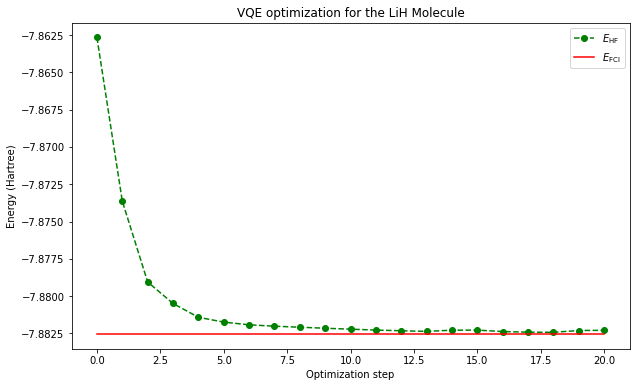

In [ ]:
import matplotlib.pyplot as plt

E_fci = -7.8825378193
fig=plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
plt.plot(range(n + 2), energy, "go", label=r"$E_\mathrm{HF}$", ls="dashed")
plt.plot(range(n + 2), np.full(n + 2, E_fci), label=r"$E_\mathrm{FCI}$", color="red")
plt.title('VQE optimization for the LiH Molecule')
plt.legend(loc='upper right')
plt.xlabel('Optimization step')
plt.ylabel('Energy (Hartree)')
plt.show()

**Final Ansatz Visualization:**

In [ ]:
conv_tol=1e-04
print("Expected ground-state energy: -7.8825378193.")
print(f"Simulation = {energy[-1]:.8f} Ha")
print(f"Convergence = {conv_tol:.4f} Ha")

Expected ground-state energy: -7.8825378193.
Simulation = -7.88229159 Ha
Convergence = 0.0001 Ha


In [ ]:
angles.shape, len(sets)

((30,), 30)

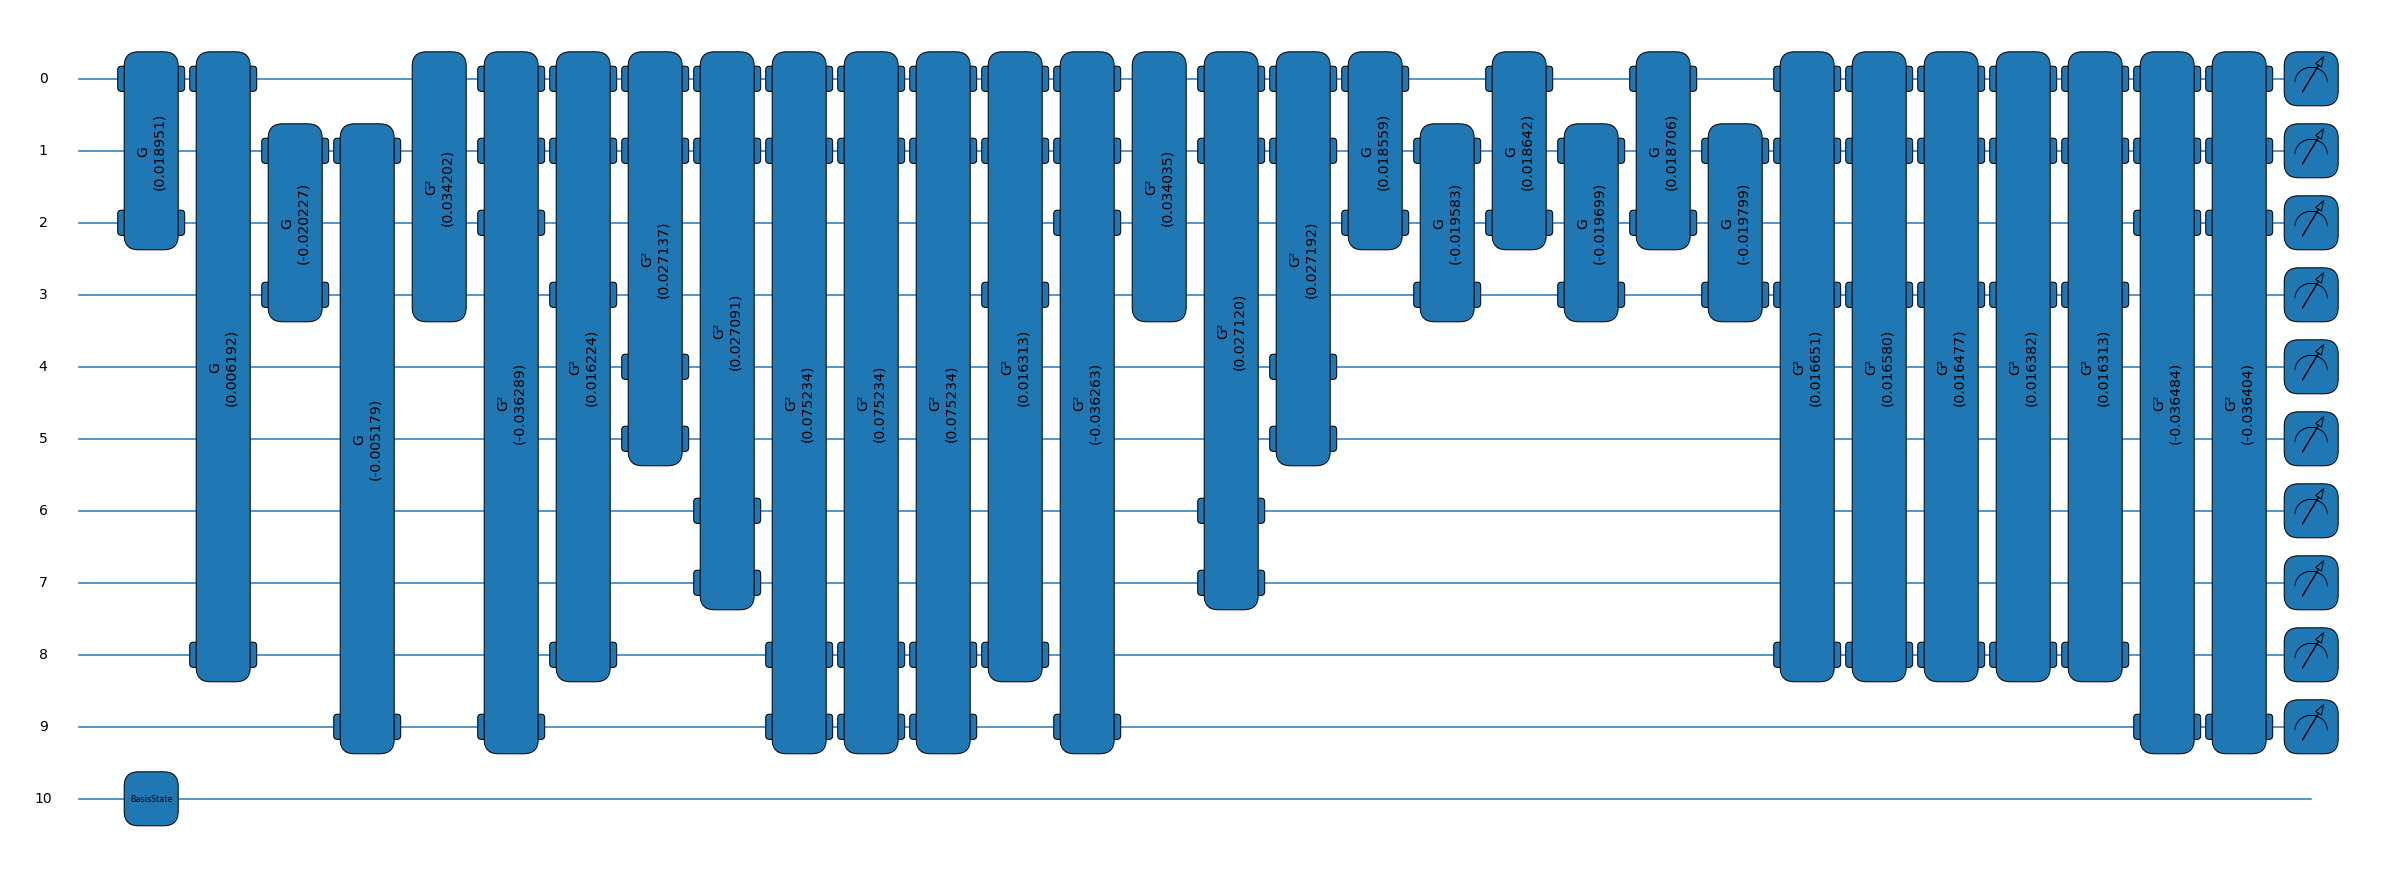

In [ ]:
dev = qml.device("default.qubit", wires=qubits)
@qml.qnode(dev)
def ansatz(params, wires, to_gates=sets):
  """Function that defines the circuit to be optimized."""
  qml.BasisState(HF, wires=wires) # Reference Hartree-Fock state.
  for i, elem in enumerate(to_gates):
    if len(elem) == 4:
      qml.DoubleExcitation(angles[i], wires=elem)
    else:
      qml.SingleExcitation(angles[i], wires=elem)
  return qml.expval(H)

fig, ax = qml.draw_mpl(ansatz, decimals=6)(params, wires=qubits)

In [ ]:
sets

[[0, 2],
 [0, 8],
 [1, 3],
 [1, 9],
 [0, 1, 2, 3],
 [0, 1, 2, 9],
 [0, 1, 3, 8],
 [0, 1, 4, 5],
 [0, 1, 6, 7],
 [0, 1, 8, 9],
 [0, 1, 8, 9],
 [0, 1, 8, 9],
 [0, 1, 3, 8],
 [0, 1, 2, 9],
 [0, 1, 2, 3],
 [0, 1, 6, 7],
 [0, 1, 4, 5],
 [0, 2],
 [1, 3],
 [0, 2],
 [1, 3],
 [0, 2],
 [1, 3],
 [0, 1, 3, 8],
 [0, 1, 3, 8],
 [0, 1, 3, 8],
 [0, 1, 3, 8],
 [0, 1, 3, 8],
 [0, 1, 2, 9],
 [0, 1, 2, 9]]

### Adding one gate per iteration without deleting gates with vanishing gradients

From the performance of the following algorithm, we see that the algorithm described in the outline achieves better results with fewer number of gates and epochs.

In [ ]:
#! /usr/bin/python3

import pennylane as qml
from pennylane import numpy as np
from pennylane import qchem
import time

def penny_simulation(params, H, HF, sets, qubits, conv_tol, threshold):
  """Main function to run the optimization loop.

  Args:
      - params (tensor): the parameters to be optimized in the ansatz.
      - H: the molecular Hamiltonian of the system in the qubit representation.
      - HF (numpy.ndarray): the Hartree-Fock state vector.
      - sets (list): total spin orbital indices used to build the Givens rotations a.k.a particle-preserving operators (qubit gates).
      - qubits (int): the number of qubits used to build the circuit.
      - conv_tol (float): convergence tolerance to stop training.
      - threshold (float): threshold for the smallest gradient.

  Returns:
      - energy (list): a list of expected values of each iteration.
      - sets (list): a list of excitations corresponding to the gates used in the final circuit.
      - params (list): a list of optimized parameters.
      - n (int): number of epochs.
  """

  def ansatz(params, wires, to_gates):
    """Function that defines the circuit to be optimized."""
    qml.BasisState(HF, wires=wires) # The reference Hartree-Fock state.
    for i, elem in enumerate(to_gates):
      if len(elem) == 4:
        qml.DoubleExcitation(params[i], wires=elem)
      else:
        qml.SingleExcitation(params[i], wires=elem)
  
  # Step 8.
  opt = qml.GradientDescentOptimizer(stepsize=0.4)  
  dev = qml.device("default.qubit", wires=qubits)
  cost = qml.ExpvalCost(ansatz, H, dev, optimize=True)
  circuit_gradient = qml.grad(cost, argnum=0)
  epochs = 20
  energy = [cost(params, to_gates=sets)]
  print(f"Epoch = 0,  Energy = {energy[-1]:.8f} Ha, t = 0s")
  print("Number of gates = {}\n".format(len(sets)))

  for n in range(epochs):
    t1 = time.time()
    grads = circuit_gradient(params,to_gates=sets) # Step 9.

    maxpos = np.argmax(grads) # Beginning of Step 10.
    max=sets[maxpos]
    sets.append(max)
    params=np.append(params, 0) # End of step 10.
    
    params, prev_energy = opt.step_and_cost(cost, params, to_gates=sets) # Step 11.
    energy.append(cost(params, to_gates=sets))
    conv = np.abs(-7.8825378193 - prev_energy) # Step 12.
    t2 = time.time()
    print(f"Epoch = {n+1}, Energy = {energy[-1]:.8f} Ha, t = {t2-t1:.2f}s")
    print("Number of gates = {}\n".format(len(sets)))
    if conv <= conv_tol:
      break

  return energy, sets, params, n

if __name__ == "__main__":
  symbols = ["Li", "H"] # Beginning of step 1.
  geometry = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 2.969280527], dtype=float)
  H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry, active_electrons=2, active_orbitals=5) # End of step 2.
  electrons = 2
  singles, doubles = qchem.excitations(electrons, qubits) # Step 3.
  sets = singles+doubles # Step 4.
  HF = qml.qchem.hf_state(electrons, qubits) # Step 5.
  params = np.zeros(len(sets), requires_grad=True) # Beginning of step 6.
  energy, sets, angles, n = penny_simulation(params, H, HF, sets, qubits, conv_tol=1e-04, threshold=1.0e-4) # Beginning of the optimization loop.
  print("Expected ground-state energy: -7.8825378193.")
  print(f"Simulation = {energy[-1]:.8f} Ha")

Epoch = 0,  Energy = -7.86266587 Ha, t = 0s
Number of gates = 24

Epoch = 1, Energy = -7.86985383 Ha, t = 19.90s
Number of gates = 25

Epoch = 2, Energy = -7.87450290 Ha, t = 21.14s
Number of gates = 26

Epoch = 3, Energy = -7.87733380 Ha, t = 22.61s
Number of gates = 27

Epoch = 4, Energy = -7.87904365 Ha, t = 23.29s
Number of gates = 28

Epoch = 5, Energy = -7.88011206 Ha, t = 23.46s
Number of gates = 29

Epoch = 6, Energy = -7.88079852 Ha, t = 23.94s
Number of gates = 30

Epoch = 7, Energy = -7.88124764 Ha, t = 24.37s
Number of gates = 31

Epoch = 8, Energy = -7.88154767 Ha, t = 24.48s
Number of gates = 32

Epoch = 9, Energy = -7.88175335 Ha, t = 24.75s
Number of gates = 33

Epoch = 10, Energy = -7.88189845 Ha, t = 24.85s
Number of gates = 34

Epoch = 11, Energy = -7.88200372 Ha, t = 25.17s
Number of gates = 35

Epoch = 12, Energy = -7.88208206 Ha, t = 25.43s
Number of gates = 36

Epoch = 13, Energy = -7.88214162 Ha, t = 26.04s
Number of gates = 37

Epoch = 14, Energy = -7.88218776 

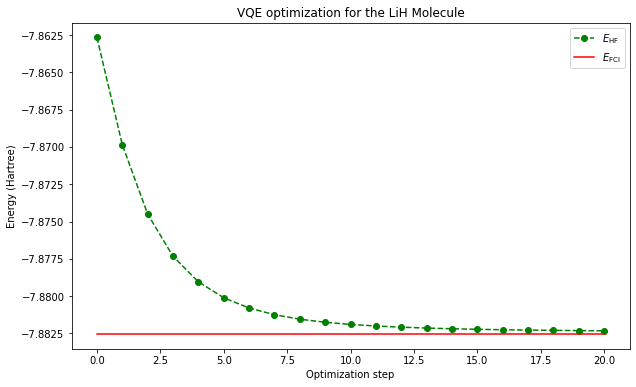

In [ ]:
import matplotlib.pyplot as plt

E_fci = -7.8825378193
fig=plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
plt.plot(range(n + 2), energy, "go", label=r"$E_\mathrm{HF}$", ls="dashed")
plt.plot(range(n + 2), np.full(n + 2, E_fci), label=r"$E_\mathrm{FCI}$", color="red")
plt.title('VQE optimization for the LiH Molecule')
plt.legend(loc='upper right')
plt.xlabel('Optimization step')
plt.ylabel('Energy (Hartree)')
plt.show()

### Comparing optimization for a fixed ansatz

The same can be said here. A variational circuit outperforms a fixed ansatz. While the first algorithm achieves -7.882 at epoch no.7 with 24 gates, the following algorihm with a fixed ansatz achineves -7.882 at epoch no. 14.

In [ ]:
#! /usr/bin/python3

import pennylane as qml
from pennylane import numpy as np
from pennylane import qchem
import time

def penny_simulation(params, H, HF, sets, qubits, conv_tol, threshold):
  """Main function to run the optimization loop.

  Args:
      - params (tensor): the parameters to be optimized in the ansatz.
      - H: the molecular Hamiltonian of the system in the qubit representation.
      - HF (numpy.ndarray): the Hartree-Fock state vector.
      - sets (list): total spin orbital indices used to build the Givens rotations a.k.a particle-preserving operators (qubit gates).
      - qubits (int): the number of qubits used to build the circuit.
      - conv_tol (float): convergence tolerance to stop training.
      - threshold (float): threshold for the smallest gradient.

  Returns:
      - energy (list): a list of expected values of each iteration.
      - sets (list): a list of excitations corresponding to the gates used in the final circuit.
      - params (list): a list of optimized parameters.
      - n (int): number of epochs.
  """

  def ansatz(params, wires, to_gates):
    """Function that defines the circuit to be optimized."""
    qml.BasisState(HF, wires=wires) # The reference Hartree-Fock state.
    for i, elem in enumerate(to_gates):
      if len(elem) == 4:
        qml.DoubleExcitation(params[i], wires=elem)
      else:
        qml.SingleExcitation(params[i], wires=elem)
  
  # Step 8.
  opt = qml.GradientDescentOptimizer(stepsize=0.4)  
  dev = qml.device("default.qubit", wires=qubits)
  cost = qml.ExpvalCost(ansatz, H, dev, optimize=True)
  circuit_gradient = qml.grad(cost, argnum=0)
  epochs = 20
  energy = [cost(params, to_gates=sets)]
  print(f"Epoch = 0,  Energy = {energy[-1]:.8f} Ha, t = 0s")
  print("Number of gates = {}\n".format(len(sets)))

  for n in range(epochs):
    t1 = time.time()
    grads = circuit_gradient(params,to_gates=sets) # Step 9. From now on we skip step 10.
    params, prev_energy = opt.step_and_cost(cost, params, to_gates=sets) # Step 11.
    energy.append(cost(params, to_gates=sets))
    conv = np.abs(-7.8825378193 - prev_energy) # Step 12.
    t2 = time.time()
    print(f"Epoch = {n+1}, Energy = {energy[-1]:.8f} Ha, t = {t2-t1:.2f}s")
    print("Number of gates = {}\n".format(len(sets)))
    if conv <= conv_tol:
      break

  return energy, sets, params, n

if __name__ == "__main__":
  symbols = ["Li", "H"] # Beginning of step 1.
  geometry = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 2.969280527], dtype=float)
  H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry, active_electrons=2, active_orbitals=5) # End of step 2.
  electrons = 2
  singles, doubles = qchem.excitations(electrons, qubits) # Step 3.
  sets = singles+doubles # Step 4.
  HF = qml.qchem.hf_state(electrons, qubits) # Step 5.
  params = np.zeros(len(sets), requires_grad=True) # Beginning of step 6.
  energy, sets, angles, n = penny_simulation(params, H, HF, sets, qubits, conv_tol=1e-04, threshold=1.0e-4) # Beginning of the optimization loop.
  print("Expected ground-state energy: -7.8825378193.")
  print(f"Simulation = {energy[-1]:.8f} Ha")

Epoch = 0,  Energy = -7.86266587 Ha, t = 0s
Number of gates = 24

Epoch = 1, Energy = -7.86947865 Ha, t = 19.14s
Number of gates = 24

Epoch = 2, Energy = -7.87385844 Ha, t = 19.82s
Number of gates = 24

Epoch = 3, Energy = -7.87667722 Ha, t = 19.51s
Number of gates = 24

Epoch = 4, Energy = -7.87849872 Ha, t = 19.59s
Number of gates = 24

Epoch = 5, Energy = -7.87968343 Ha, t = 19.79s
Number of gates = 24

Epoch = 6, Energy = -7.88046071 Ha, t = 19.69s
Number of gates = 24

Epoch = 7, Energy = -7.88097626 Ha, t = 22.16s
Number of gates = 24

Epoch = 8, Energy = -7.88132277 Ha, t = 19.82s
Number of gates = 24

Epoch = 9, Energy = -7.88155938 Ha, t = 19.53s
Number of gates = 24

Epoch = 10, Energy = -7.88172397 Ha, t = 19.62s
Number of gates = 24

Epoch = 11, Energy = -7.88184092 Ha, t = 19.22s
Number of gates = 24

Epoch = 12, Energy = -7.88192606 Ha, t = 19.49s
Number of gates = 24

Epoch = 13, Energy = -7.88198970 Ha, t = 19.13s
Number of gates = 24

Epoch = 14, Energy = -7.88203861 

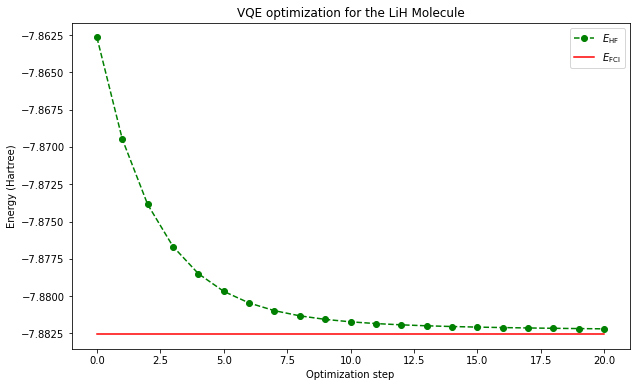

In [ ]:
import matplotlib.pyplot as plt

E_fci = -7.8825378193
fig=plt.figure()
fig.set_figheight(6)
fig.set_figwidth(10)
plt.plot(range(n + 2), energy, "go", label=r"$E_\mathrm{HF}$", ls="dashed")
plt.plot(range(n + 2), np.full(n + 2, E_fci), label=r"$E_\mathrm{FCI}$", color="red")
plt.title('VQE optimization for the LiH Molecule')
plt.legend(loc='upper right')
plt.xlabel('Optimization step')
plt.ylabel('Energy (Hartree)')
plt.show()

## Qamuy

In [ ]:
email_address = "email_address" #@param
password = "password" #@param

In [ ]:
!qamuy reset-password

In [ ]:
!qamuy login

In [ ]:
qclient = Client(email_address=email_address, password=password)

In [ ]:
setting = qy.QamuyChemistryInput()

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References


\[1] McClean, J.R., Boixo, S., Smelyanskiy, V.N. et al. Barren plateaus in quantum neural network training landscapes. [Nat Commun 9, 4812 (2018)](https://www.nature.com/articles/s41467-018-07090-4). 

\[2] Grimsley, H. R.; Claudino, D.; Economou, S. E.; Barnes, E.; Mayhall, N. J. Is the trotterized uccsd ansatz chemically well-defined? [J. Chem. Theory Comput. 2020, 16, 1](https://pubs.acs.org/doi/abs/10.1021/acs.jctc.9b01083).

[3] Harper R. Grimsley, Sophia E. Economou, Edwin Barnes, Nicholas J. Mayhall, “An adaptive variational algorithm for exact molecular simulations on a quantum computer”. [Nat. Commun. 2019, 10, 3007](https://www.nature.com/articles/s41467-019-10988-2).

[4] PennyLane dev team, "Adaptive circuits for quantum chemistry". [PennyLane, 13 September 2021](https://pennylane.ai/qml/demos/tutorial_adaptive_circuits.html).

[5] Peruzzo, A., McClean, J., Shadbolt, P. et al. A variational eigenvalue solver on a photonic quantum processor. [Nat Commun 5, 4213 (2014)](https://doi.org/10.1038/ncomms5213).